<a href="https://colab.research.google.com/github/SarinaMashreghi/Drug-Identification/blob/main/CV%20models/packaging_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#reading the data

In [ ]:
import zipfile

train_ref = zipfile.ZipFile("/content/drive/MyDrive/SF_data/Packaging/packaging_train.zip")
train_ref.extractall()
train_ref.close()

test_ref = zipfile.ZipFile("/content/drive/MyDrive/SF_data/Packaging/packaging_test.zip")
test_ref.extractall()
test_ref.close()

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('/content/train'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

there are 150 directories and 0 files in /content/train
there are 0 directories and 18 files in /content/train/GTN 50 ml cream
there are 0 directories and 18 files in /content/train/Cetal Sinus 20 capsules
there are 0 directories and 18 files in /content/train/Fucidin 15 g cream
there are 0 directories and 18 files in /content/train/Osteocare 120 ml liquid
there are 0 directories and 18 files in /content/train/Diclac 30  gm gel
there are 0 directories and 18 files in /content/train/Hemoclar 40 g cream
there are 0 directories and 18 files in /content/train/Diflucan 7 capsules
there are 0 directories and 18 files in /content/train/Free Nose 30 ml nasal spray
there are 0 directories and 18 files in /content/train/Asmakast 30 tablets
there are 0 directories and 18 files in /content/train/Milga 40 tablets
there are 0 directories and 18 files in /content/train/Predsol 50 ml syrup
there are 0 directories and 18 files in /content/train/Micropore nan Tape
there are 0 directories and 18 files in

In [ ]:
print(len(os.listdir('/content/train')))

150


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224,224)

train_data = image_dataset_from_directory(directory='/content/train',
                                          validation_split=0.2,
                                          subset='training',
                                          seed=42,
                                          image_size=IMG_SIZE,
                                          label_mode='categorical')

valid_data = image_dataset_from_directory(directory='/content/train',
                                          validation_split=0.2,
                                          subset='validation',
                                          seed=42,
                                          image_size=IMG_SIZE,
                                          label_mode='categorical')

test_data = image_dataset_from_directory(directory='/content/test',
                                          seed=42,
                                          image_size=IMG_SIZE,
                                          label_mode='categorical')

Found 2700 files belonging to 150 classes.
Using 2160 files for training.
Found 2700 files belonging to 150 classes.
Using 540 files for validation.
Found 1050 files belonging to 150 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
train_gen = ImageDataGenerator(rotation_range=0.2,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               rescale=1/255.,
                               validation_split=0.2)

test_gen = ImageDataGenerator(rescale=1/255.)

train_data_2 = train_gen.flow_from_directory(directory='/content/train',
                                             subset='training',
                                             seed=42,
                                             class_mode='categorical',
                                             target_size=IMG_SIZE,
                                             color_mode='rgb')

valid_data_2 = train_gen.flow_from_directory(directory='/content/train',
                                             subset='validation',
                                             seed=42,
                                             class_mode='categorical',
                                             target_size=IMG_SIZE,
                                             color_mode='rgb')

test_data_2 = test_gen.flow_from_directory(directory='/content/test',
                                             seed=42,
                                             class_mode='categorical',
                                             target_size=IMG_SIZE,
                                             color_mode='rgb')

Found 2250 images belonging to 150 classes.
Found 450 images belonging to 150 classes.
Found 1050 images belonging to 150 classes.


In [ ]:
import datetime
import tensorflow as tf

def create_tensorboard_callbakc(dir_name, exp_name):
  log_dir = dir_name + "/" + exp_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"saving tensorboard log files to: {log_dir}")
  return tboard_callback

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

def create_checkpoint_callback(model_name):
  checkpoint_path = "/content/drive/MyDrive/SF_data/trained_models/packaging_models/"+model_name+'_checkpoint'
  checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                        save_weights_only=True, 
                                        monitor="val_accuracy",
                                        save_best_only=True)
  return checkpoint_callback

In [ ]:
#data 1

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_accuracy',
                                patience=10,
                                verbose=1,
                                restore_best_weights=True,
                                mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_aug = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
], name="data_augmentation_layer")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential 
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

#Model 1: ResNet feature extraction

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


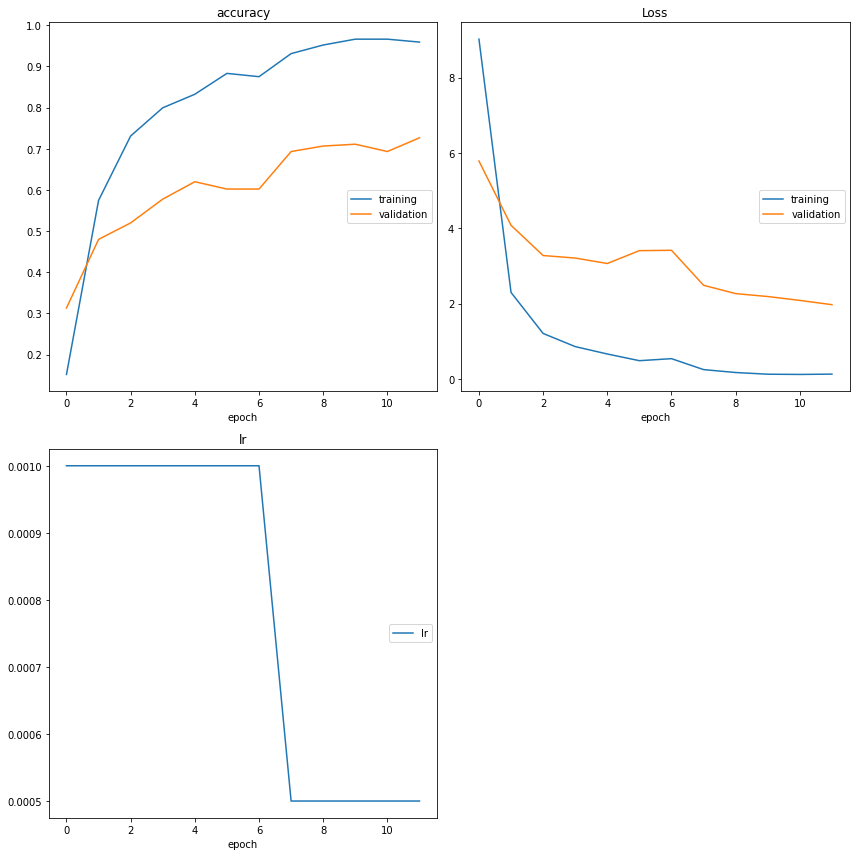

accuracy
	training         	 (min:    0.152, max:    0.966, cur:    0.959)
	validation       	 (min:    0.313, max:    0.727, cur:    0.727)
Loss
	training         	 (min:    0.121, max:    9.022, cur:    0.130)
	validation       	 (min:    1.972, max:    5.787, cur:    1.972)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
71/71 [==============================] - 423s 6s/step - loss: 0.1297 - accuracy: 0.9591 - val_loss: 1.9724 - val_accuracy: 0.7267 - lr: 5.0000e-04
Epoch 13/60
71/71 [==============================] - ETA: 0s - loss: 0.1588 - accuracy: 0.9471

In [ ]:
from livelossplot import PlotLossesKeras
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False


inputs = tf.keras.layers.Input(shape=(224,224,3))

x = base_model(inputs)
x = tf.keras.layers.GlobalMaxPooling2D()(x)
outputs = tf.keras.layers.Dense(150, activation='softmax')(x)

res_model = tf.keras.Model(inputs, outputs)

res_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

tb_res = create_tensorboard_callbakc('tf_hub', 'resnet model fine tuning')
cp_cb_res = create_checkpoint_callback('resnet model')


res_history = res_model.fit(train_data_2, validation_data=valid_data_2, epochs=60, callbacks=[tb_res, cp_cb_res, early_stopping, reduce_lr, PlotLossesKeras()])

# res_model.save('/content/drive/MyDrive/SF_data/trained_models/packaging_models/resnet_model_1.h5')

# from tensorflow import lite
# import tensorflow as tf
# converter = lite.TFLiteConverter.from_keras_model(res_model)
# tfmodel = converter.convert()
# open("/content/drive/MyDrive/SF_data/trained_models/packaging_models/resnet_model_1.tflite", "wb").write(tfmodel)

In [ ]:
import tensorflow as tf

base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False


inputs = tf.keras.layers.Input(shape=(224,224,3))

x = base_model(inputs)
x = tf.keras.layers.GlobalMaxPooling2D()(x)
outputs = tf.keras.layers.Dense(150, activation='softmax')(x)

loaded_model = tf.keras.Model(inputs, outputs)

loaded_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/SF_data/trained_models/packaging_models/resnet model_checkpoint.data')

OSError: ignored

#Model 2: VGG

In [ ]:
img_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
base_vgg = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=img_shape)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
lr = 0.01

x = data_aug(base_vgg.input)
x = base_vgg(x, training=False)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
# x = Dense(512, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
#                 bias_regularizer=regularizers.l1(0.006) ,activation='leaky_relu')(x)
x = GlobalMaxPooling2D()(x)

x=Dropout(rate=0.2)(x)       
output=Dense(150, activation='softmax')(x)

vgg_model = tf.keras.Model(base_vgg.input, output)

vgg_model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=["accuracy"])

vgg_model.fit(train_data, 
              validation_data=valid_data,
              epochs=100, 
              callbacks=[reduce_lr, checkpoint_callback, early_stopping])

Epoch 1/100
68/68 [==============================] - 387s 5s/step - loss: 5.0405 - accuracy: 0.0093 - val_loss: 5.1336 - val_accuracy: 0.0037 - lr: 0.0100
Epoch 2/100
68/68 [==============================] - 358s 5s/step - loss: 5.0619 - accuracy: 0.0069 - val_loss: 5.1298 - val_accuracy: 0.0019 - lr: 0.0100
Epoch 3/100
68/68 [==============================] - 340s 5s/step - loss: 5.0500 - accuracy: 0.0056 - val_loss: 5.1268 - val_accuracy: 0.0037 - lr: 0.0100
Epoch 4/100
68/68 [==============================] - 336s 5s/step - loss: 5.0255 - accuracy: 0.0106 - val_loss: 5.2086 - val_accuracy: 0.0037 - lr: 0.0100
Epoch 5/100
68/68 [==============================] - 316s 4s/step - loss: 5.0336 - accuracy: 0.0088 - val_loss: 5.1787 - val_accuracy: 0.0037 - lr: 0.0100
Epoch 6/100
68/68 [==============================] - 306s 4s/step - loss: 5.0198 - accuracy: 0.0097 - val_loss: 5.1636 - val_accuracy: 0.0037 - lr: 0.0050
Epoch 7/100
68/68 [==============================] - 315s 4s/step - lo

##VGG model 2

In [ ]:
num_classes = 150
lr = 0.001
num_epochs = 100

x = Flatten()(base_vgg.output)
x = Dense(256, activation='relu', kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006))(x)
x = Dense(256, activation='relu', kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006))(x)
x = Dense(num_classes, activation='softmax')(x)

vgg_model_2 = tf.keras.Model(base_vgg.input, x)

vgg_model_2.compile(loss='categorical_crossentropy',
                    optimizer=Adam(learning_rate=lr),
                    metrics=['accuracy'])

tb_cb_vgg_2 = create_tensorboard_callback('tf_hub', 'VGG model transfer learning')
chck_cb = create_checkpoint_callback('vgg_2')

history_vgg_2 = vgg_model_2.fit(train_data_2, 
                                validation_data=valid_data_2,
                                epochs=num_epochs,
                                callbacks=[tb_cb_vgg_2, reduce_lr, early_stopping, chck_cb])


#EfficientNet

In [ ]:
efn_base = tf.keras.applications.efficientnet.EfficientNetB5(include_top=False)
efn_base.trainable = False


inputs = tf.keras.layers.Input(shape=(224,224,3))

x = efn_base(inputs)
x = tf.keras.layers.GlobalMaxPooling2D()(x)
outputs = tf.keras.layers.Dense(150, activation='softmax')(x)

efn_model = tf.keras.Model(inputs, outputs)

efn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

tb_efn = create_tensorboard_callbakc('tf_hub', 'efficientnet model')
cp_cb_efn = create_checkpoint_callback('efficientnet model')


efn_history = efn_model.fit(train_data_2, validation_data=valid_data_2, epochs=50, callbacks=[tb_efn, cp_cb_efn, early_stopping, reduce_lr])

115263384/115263384 [==============================] - 1s 0us/step
saving tensorboard log files to: tf_hub/efficientnet model/20230207-180550
Epoch 1/50
26/71 [=========>....................] - ETA: 10:27 - loss: 35.9180 - accuracy: 0.0024

KeyboardInterrupt: ignored

#Feature extraction 

In [ ]:
import tensorflow_hub as hub

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
from tensorflow.keras import layers

def create_model(model_url, num_classes):
  feature_extractor_layer = hub.KerasLayer(model_url, 
                                           trainable=False, 
                                           input_shape=(224,224,3),
                                           name="feature_extractor_layer")
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])
  return model


In [ ]:
resnet_model = create_model(resnet_url, 150)

resnet_model.compile(loss="categorical_crossentropy",
                     optimizer="adam",
                     metrics=["accuracy"])

resnet_history = resnet_model.fit(train_data_2,
                                  validation_data=valid_data_2, 
                                  epochs=5, 
                                  callbacks=[create_tensorboard_callbakc("tensorflow_hub",
                                                                         "resnet50V2")])

saving tensorboard log files to: tensorflow_hub/resnet50V2/20230207-181359
Epoch 1/5
71/71 [==============================] - 872s 12s/step - loss: 4.1133 - accuracy: 0.1933 - val_loss: 2.9365 - val_accuracy: 0.4356
Epoch 2/5
71/71 [==============================] - 891s 13s/step - loss: 1.7918 - accuracy: 0.7111 - val_loss: 2.1248 - val_accuracy: 0.5911
Epoch 3/5
71/71 [==============================] - 902s 13s/step - loss: 1.0406 - accuracy: 0.8587 - val_loss: 1.6992 - val_accuracy: 0.6622
Epoch 4/5
71/71 [==============================] - 875s 12s/step - loss: 0.7053 - accuracy: 0.9133 - val_loss: 1.5399 - val_accuracy: 0.6622
Epoch 5/5
71/71 [==============================] - 867s 12s/step - loss: 0.5304 - accuracy: 0.9356 - val_loss: 1.3580 - val_accuracy: 0.7156


##EfficientNet

In [ ]:
efn_model = create_model(efficientnet_url, 150)

efn_model.compile(loss = "categorical_crossentropy",
                  optimizer = "adam",
                  metrics=["accuracy"])

rfn_history = efn_model.fit(train_data, epochs = 10, validation_data = test_data, callbacks=[create_tensorboard_callbakc("tensorflow_hub",
                                                                         "efficientnetb0")])

In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "packaging models" \
  --description "fine tuning models on packaging images" \
  --one_shot